# Creating Cohorts of Songs Project - Main File

#### Problem Objective: As a data scientist, you should perform exploratory data analysis and cluster analysis to create cohorts of songs. The goal is to understand better the various factors that create a cohort of songs.

## 1. Initial Data Inspection and Cleaning

In [1]:
# load relevant libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

In [2]:
#loading the data as 'df' and setting the first column as the index

df = pd.read_csv('rolling_stones_spotify.csv', index_col=0)

In [3]:
#checking to make sure data loaded correctly 
df

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.9320,-12.913,0.1100,118.001,0.0302,33,48640
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.9610,-4.803,0.0759,131.455,0.3180,34,253173
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.9560,-4.936,0.1150,130.066,0.3130,34,263160
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.8950,-5.535,0.1930,132.994,0.1470,32,305880
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.9660,-5.098,0.0930,130.533,0.2060,32,305106
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1605,Carol,The Rolling Stones,1964-04-16,8,08l7M5UpRnffGl0FyuRiQZ,spotify:track:08l7M5UpRnffGl0FyuRiQZ,0.1570,0.466,0.932,0.006170,0.3240,-9.214,0.0429,177.340,0.9670,39,154080
1606,Tell Me,The Rolling Stones,1964-04-16,9,3JZllQBsTM6WwoJdzFDLhx,spotify:track:3JZllQBsTM6WwoJdzFDLhx,0.0576,0.509,0.706,0.000002,0.5160,-9.427,0.0843,122.015,0.4460,36,245266
1607,Can I Get A Witness,The Rolling Stones,1964-04-16,10,0t2qvfSBQ3Y08lzRRoVTdb,spotify:track:0t2qvfSBQ3Y08lzRRoVTdb,0.3710,0.790,0.774,0.000000,0.0669,-7.961,0.0720,97.035,0.8350,30,176080
1608,You Can Make It If You Try,The Rolling Stones,1964-04-16,11,5ivIs5vwSj0RChOIvlY3On,spotify:track:5ivIs5vwSj0RChOIvlY3On,0.2170,0.700,0.546,0.000070,0.1660,-9.567,0.0622,102.634,0.5320,27,121680


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1610 entries, 0 to 1609
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              1610 non-null   object 
 1   album             1610 non-null   object 
 2   release_date      1610 non-null   object 
 3   track_number      1610 non-null   int64  
 4   id                1610 non-null   object 
 5   uri               1610 non-null   object 
 6   acousticness      1610 non-null   float64
 7   danceability      1610 non-null   float64
 8   energy            1610 non-null   float64
 9   instrumentalness  1610 non-null   float64
 10  liveness          1610 non-null   float64
 11  loudness          1610 non-null   float64
 12  speechiness       1610 non-null   float64
 13  tempo             1610 non-null   float64
 14  valence           1610 non-null   float64
 15  popularity        1610 non-null   int64  
 16  duration_ms       1610 non-null   int64  
dtype

In [5]:
df.describe()

,track_number,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms
count,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.00000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000,1610.000000
mean,8.613665,0.250475,0.468860,0.792352,0.164170,0.49173,-6.971615,0.069512,126.082033,0.582165,20.788199,257736.488199
std,6.560220,0.227397,0.141775,0.179886,0.276249,0.34910,2.994003,0.051631,29.233483,0.231253,12.426859,108333.474920
min,1.000000,0.000009,0.104000,0.141000,0.000000,0.02190,-24.408000,0.023200,46.525000,0.000000,0.000000,21000.000000
25%,4.000000,0.058350,0.362250,0.674000,0.000219,0.15300,-8.982500,0.036500,107.390750,0.404250,13.000000,190613.000000
50%,7.000000,0.183000,0.458000,0.848500,0.013750,0.37950,-6.523000,0.051200,124.404500,0.583000,20.000000,243093.000000
75%,11.000000,0.403750,0.578000,0.945000,0.179000,0.89375,-4.608750,0.086600,142.355750,0.778000,27.000000,295319.750000
max,47.000000,0.994000,0.887000,0.999000,0.996000,0.99800,-1.014000,0.624000,216.304000,0.974000,80.000000,981866.000000


In [6]:
# count if there are any empty values

total_missing_values = df.isnull().sum().sum()
print(f"Total missing values: {total_missing_values}")

# no empty values, so we don't need to drop anything

Total missing values: 0


In [7]:
# Count if there are any duplicate rows

duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

# no duplicate, so we don't need to drop anything

Number of duplicate rows: 0


In [8]:
# double checking that each song ID is unique

duplicate_ids = df[df['id'].duplicated(keep=False)]
print(duplicate_ids)


Empty DataFrame
Columns: [name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms]
Index: []


## 2. Further Refine the Data

In [9]:
# release_date format is currently an object, so i want to change release_date to a date format

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')


In [10]:
# making sure the converstion worked and the data type is now correct

nat_counts = df['release_date'].isna().sum()
print(f"Number of NaT entries: {nat_counts}")
df['release_date'].dtype

Number of NaT entries: 0


dtype('<M8[ns]')

In [11]:
# further breaking the date into year and month columns in case we need to examine records by years or months in later steps

df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month

df.head() #making sure the columns were added

,name,album,release_date,track_number,id,uri,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity,duration_ms,release_year,release_month
0,Concert Intro Music - Live,Licked Live In NYC,2022-06-10,1,2IEkywLJ4ykbhi1yRQvmsT,spotify:track:2IEkywLJ4ykbhi1yRQvmsT,0.0824,0.463,0.993,0.996000,0.932,-12.913,0.1100,118.001,0.0302,33,48640,2022,6
1,Street Fighting Man - Live,Licked Live In NYC,2022-06-10,2,6GVgVJBKkGJoRfarYRvGTU,spotify:track:6GVgVJBKkGJoRfarYRvGTU,0.4370,0.326,0.965,0.233000,0.961,-4.803,0.0759,131.455,0.3180,34,253173,2022,6
2,Start Me Up - Live,Licked Live In NYC,2022-06-10,3,1Lu761pZ0dBTGpzxaQoZNW,spotify:track:1Lu761pZ0dBTGpzxaQoZNW,0.4160,0.386,0.969,0.400000,0.956,-4.936,0.1150,130.066,0.3130,34,263160,2022,6
3,If You Can't Rock Me - Live,Licked Live In NYC,2022-06-10,4,1agTQzOTUnGNggyckEqiDH,spotify:track:1agTQzOTUnGNggyckEqiDH,0.5670,0.369,0.985,0.000107,0.895,-5.535,0.1930,132.994,0.1470,32,305880,2022,6
4,Don’t Stop - Live,Licked Live In NYC,2022-06-10,5,7piGJR8YndQBQWVXv6KtQw,spotify:track:7piGJR8YndQBQWVXv6KtQw,0.4000,0.303,0.969,0.055900,0.966,-5.098,0.0930,130.533,0.2060,32,305106,2022,6


In [12]:
# checking if all acousticness values fall within the appropriate range

invalid_acousticness = df[(df['acousticness'] <= 0.0) | (df['acousticness'] >= 1.0)]
print(invalid_acousticness)

# all values fall within range

Empty DataFrame
Columns: [name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms, release_year, release_month]
Index: []


In [13]:
# checking if all danceability values fall within the appropriate range

invalid_danceability = df[(df['danceability'] <= 0.0) | (df['danceability'] >= 1.0)]
print(invalid_danceability)

# all values fall within range

Empty DataFrame
Columns: [name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms, release_year, release_month]
Index: []


In [14]:
# checking if all energy values fall within the appropriate range

invalid_energy = df[(df['energy'] <= 0.0) | (df['energy'] >= 1.0)]
print(invalid_energy)

# all values fall within range

Empty DataFrame
Columns: [name, album, release_date, track_number, id, uri, acousticness, danceability, energy, instrumentalness, liveness, loudness, speechiness, tempo, valence, popularity, duration_ms, release_year, release_month]
Index: []


In [15]:
# checking if all valence values fall within the appropriate range

invalid_valence = df[(df['valence'] <= 0.0) | (df['valence'] >= 1.0)]
print(invalid_valence)

# all values fall within range. The one that shows below is exactly 0, which is still valid.

                  name                                              album  \
546  Show Intro - Live  Live 1965: Music From Charlie Is My Darling (L...   

    release_date  track_number                      id  \
546   2012-11-06             1  4Z2rzPq2mZk7dRdWWE0oo4   

                                      uri  acousticness  danceability  energy  \
546  spotify:track:4Z2rzPq2mZk7dRdWWE0oo4         0.852         0.172    0.87   

     instrumentalness  liveness  loudness  speechiness    tempo  valence  \
546             0.875     0.708   -18.104       0.0506  128.417      0.0   

     popularity  duration_ms  release_year  release_month  
546           0        21000          2012             11  


In [16]:
# making sure the track number starts at '1' for each album

track_issues = df.groupby('album')['track_number'].min().reset_index()
print(track_issues[track_issues['track_number'] != 1])

Empty DataFrame
Columns: [album, track_number]
Index: []


In [17]:
# removing any leading or trailing spaces for song names and album
df['name'] = df['name'].str.strip()
df['album'] = df['album'].str.strip()

from titlecase import titlecase
# making sure song names and albums are capitalized in proper title format
df['name'] = df['name'].apply(titlecase)
df['album'] = df['album'].apply(titlecase)

## Perform Exploraty Data Analysis and Feature Engineering

#### a. Utilize suitable visualizations to identify the two albums that should be recommended to anyone based on the number of popular songs in each album

In [18]:
# first I need to define what I consider "popular" songs
# I will consider a song popular if its' popularity score is above the 80th percentile

popularity_threshold = df['popularity'].quantile(0.8)
print(f"Popularity threshold: {popularity_threshold}")


Popularity threshold: 29.0


In [19]:
#filtering the df to only include popular songs

popular_songs = df[df['popularity'] > popularity_threshold]


In [20]:
# counting the number of popular songs each album contains

popular_songs_per_album = popular_songs.groupby('album').size().sort_values(ascending=False)
popular_songs_per_album

album
Exile on Main Street (2010 Re-Mastered)                                            18
Blue & Lonesome                                                                    12
Exile on Main Street (Deluxe Version)                                              12
Voodoo Lounge (Remastered 2009)                                                    11
Aftermath                                                                          11
Tattoo You (2009 Re-Mastered)                                                      11
Out of Our Heads                                                                   11
Honk (Deluxe)                                                                      11
The Rolling Stones                                                                 10
Sticky Fingers (Remastered)                                                        10
Some Girls                                                                         10
Let It Bleed                                    

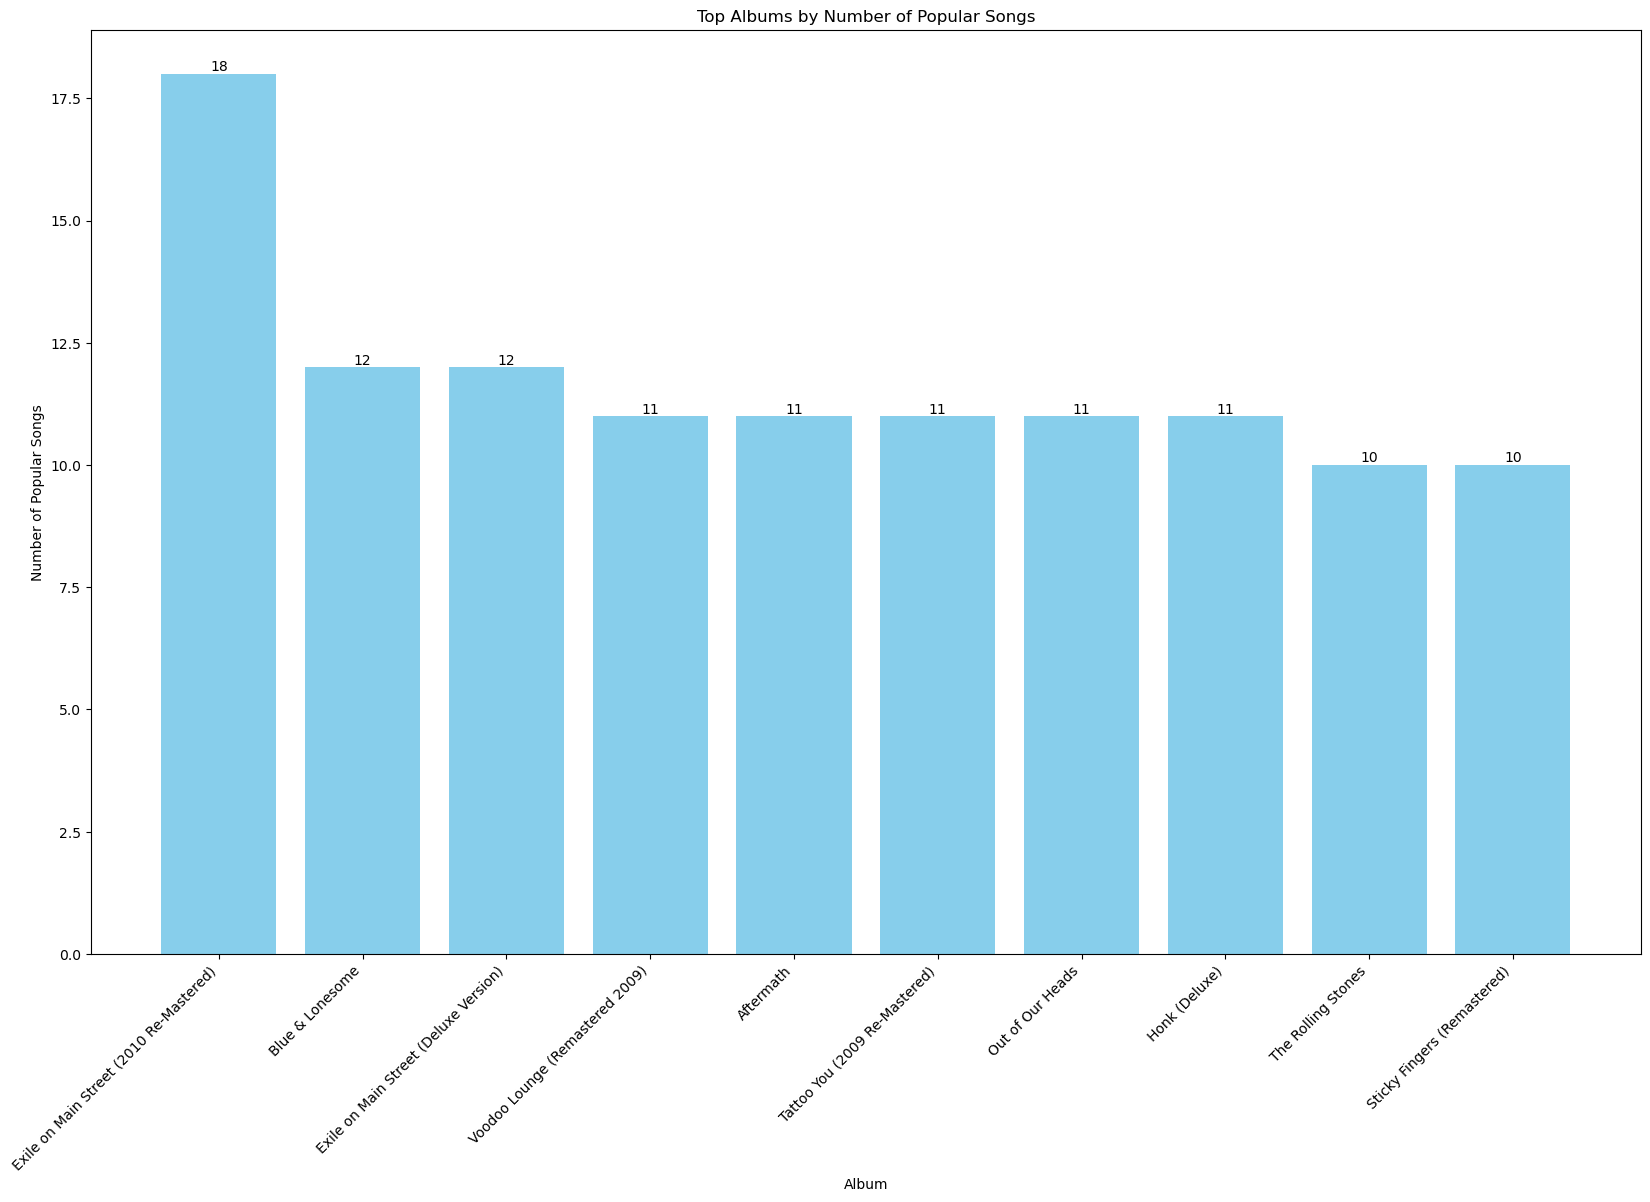

In [21]:
# visualizing the top 10 results with a bar plot

plt.figure(figsize=(20, 12))
bars = plt.bar(popular_songs_per_album.head(10).index, popular_songs_per_album.head(10). values, color='skyblue')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

plt.title('Top Albums by Number of Popular Songs')
plt.xlabel('Album')
plt.ylabel('Number of Popular Songs')
plt.xticks(rotation=45, ha='right')
plt.show()

### Conclusion: The two albums that should be recommended to anyone based on thier number of popular songs are:
### 1) Exhile on Main Street (2010 Re-Mastered) and 2) Blue & Lonesome
### Exhile on Main Street (Deluxe Version) had the same number of popular songs as Blue & Lonesome, but since it's
### essentially the same album as the Re-Mastered I went with Blue & Lonesome

## b. Conduct exploratory data analysis to delve into various features of songs, aiming to identify patterns

<function matplotlib.pyplot.show(close=None, block=None)>

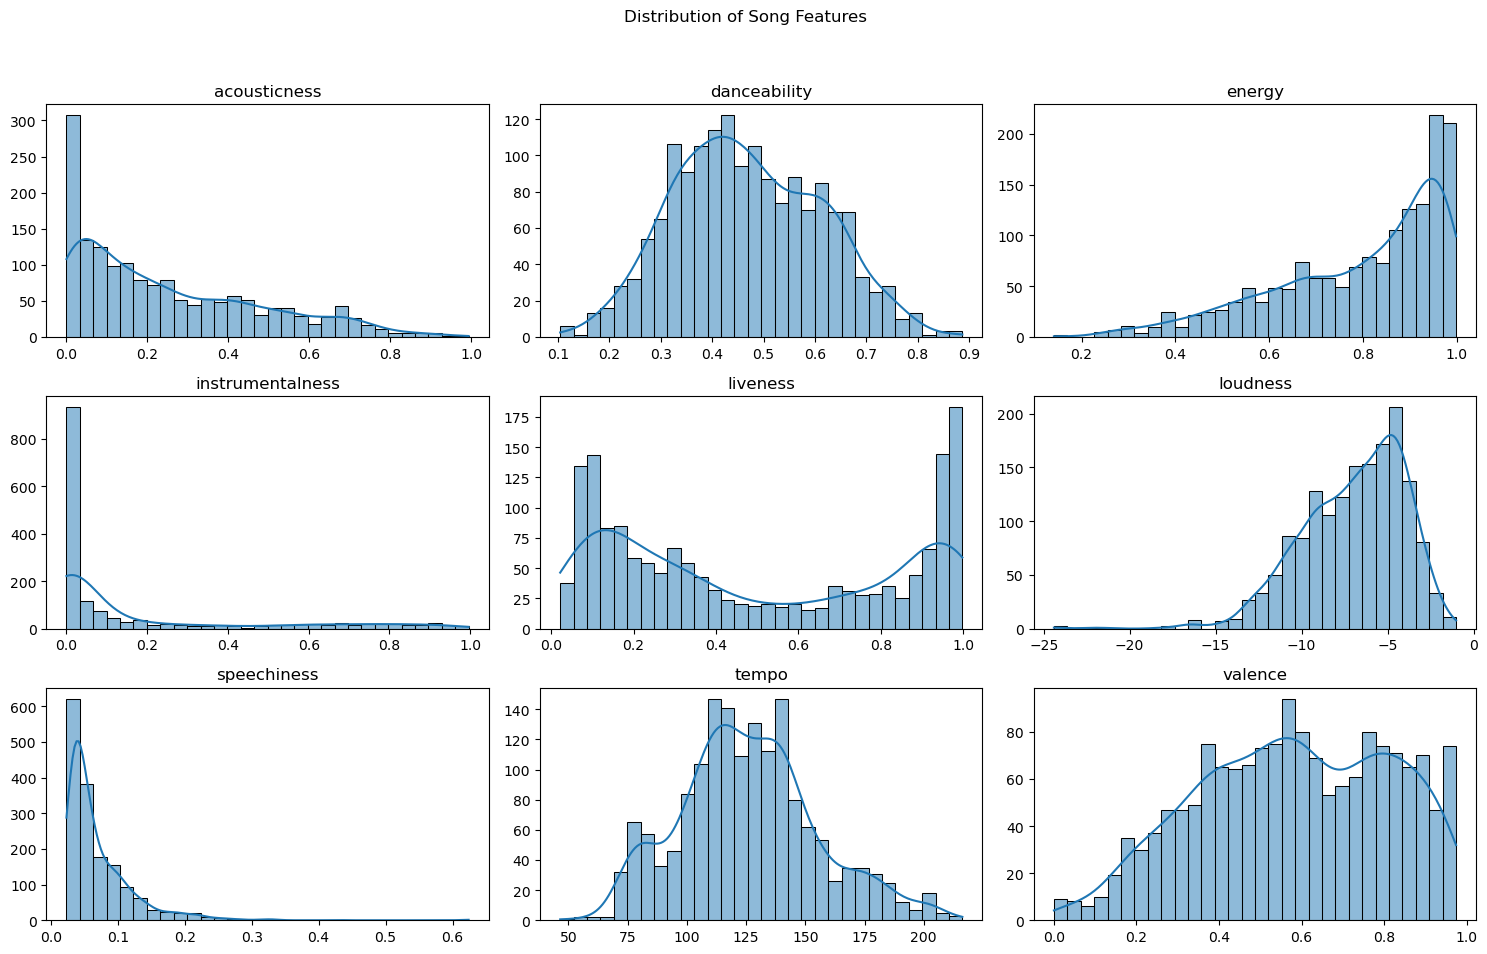

In [22]:
# visualizing distribution of different features across all songs

features = ['acousticness', 'danceability', 'energy', 'instrumentalness', 'liveness', 'loudness', 'speechiness', 'tempo', 'valence']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
fig.suptitle('Distribution of Song Features')

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    sns.histplot(df[feature], bins=30, kde=True, ax=axes[row][col])
    axes[row][col].set_title(feature)
    axes[row][col].set_xlabel('')
    axes[row][col].set_ylabel('')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show

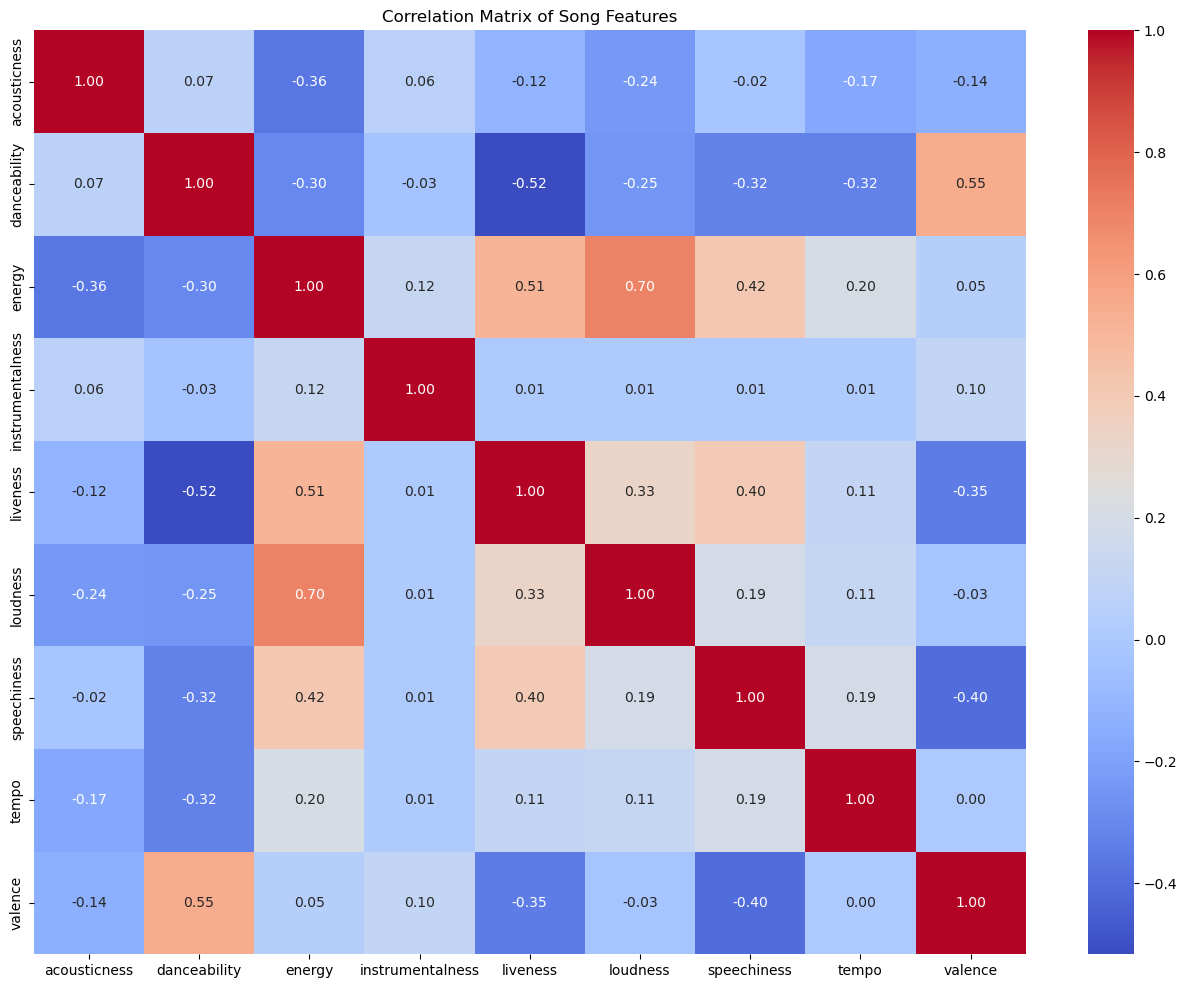

In [23]:
# looking at correlations between features with a correlation matrix heatmap

plt.figure(figsize=(16,12))
sns.heatmap(df[features].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of Song Features')
plt.show()


## c. Examine the relationship between a song's popularity and various factors, exploring how this correlation has evolved

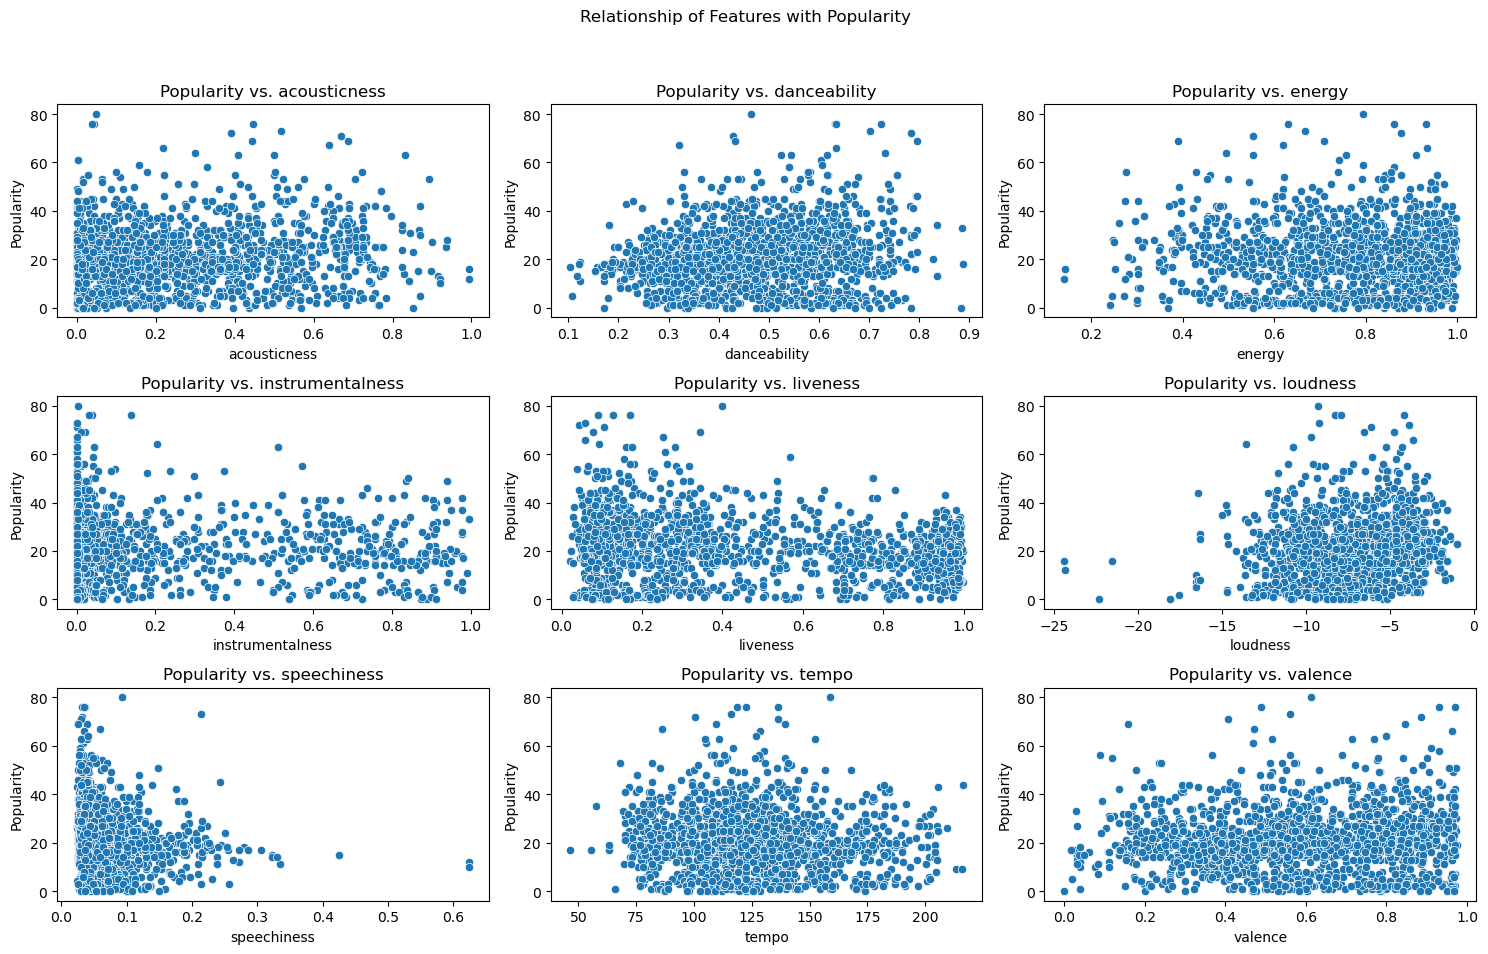

In [24]:
# analyzing relationships of features to song popularity

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15,10))
fig.suptitle('Relationship of Features with Popularity')

for i, feature in enumerate(features):
    row, col = i // 3, i % 3
    sns.scatterplot(x=df[feature], y=df['popularity'], ax=axes[row][col])
    axes[row][col].set_title(f'Popularity vs. {feature}')
    axes[row][col].set_xlabel(feature)
    axes[row][col].set_ylabel('Popularity')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [25]:
# group analysis for looking at average features by popular albums

album_summary = df.groupby('album')[features + ['popularity']].mean().sort_values(by='popularity', ascending=False)
print(album_summary.head())

                                            acousticness  danceability  \
album                                                                    
Sticky Fingers (Remastered)                     0.398230      0.482800   
Some Girls                                      0.405700      0.583700   
Tattoo You (2009 Re-Mastered)                   0.164955      0.546727   
Exile on Main Street (2010 Re-Mastered)         0.498383      0.493944   
Beggars Banquet (50th Anniversary Edition)      0.273740      0.492800   

                                              energy  instrumentalness  \
album                                                                    
Sticky Fingers (Remastered)                 0.669200          0.149533   
Some Girls                                  0.891900          0.359980   
Tattoo You (2009 Re-Mastered)               0.770818          0.075877   
Exile on Main Street (2010 Re-Mastered)     0.807556          0.528325   
Beggars Banquet (50th Anniversary Edi

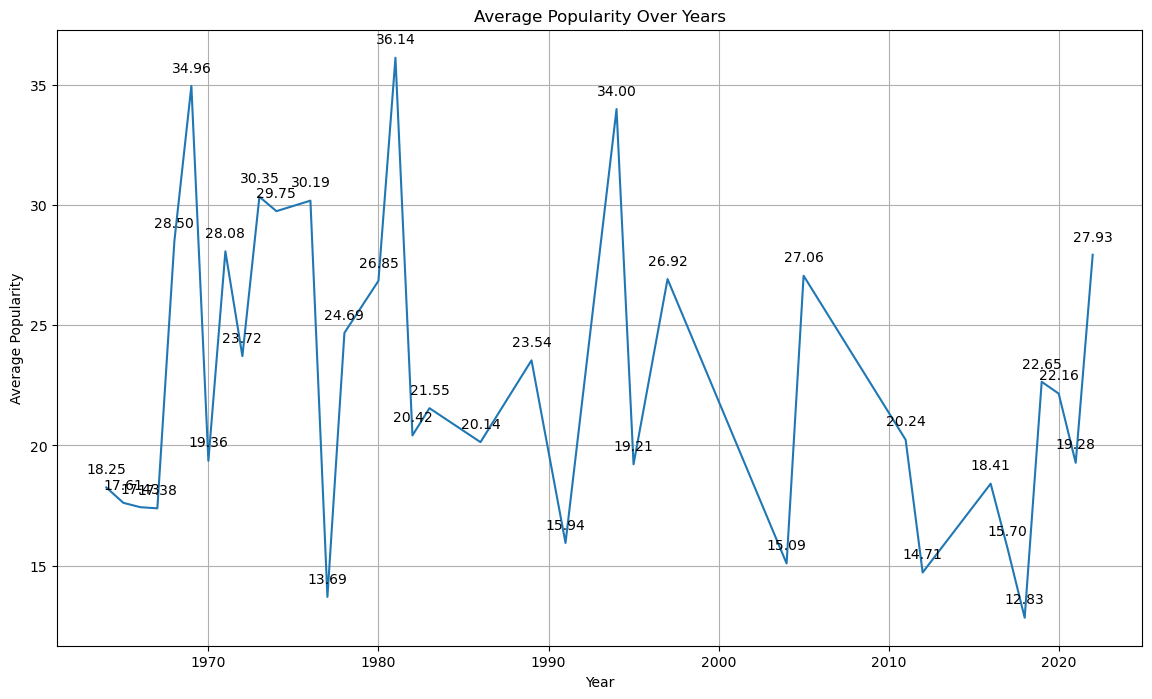

In [26]:
# group analysis for looking at trends of popularity over time 

yearly_trends = df.groupby(df['release_date'].dt.year)[features + ['popularity']].mean()
plt.figure(figsize=(14,8))
yearly_trends['popularity'].plot(title='Average Popularity Over Years')
plt.xlabel('Year')
plt.ylabel('Average Popularity')
plt.grid(True)

for year, pop in yearly_trends['popularity'].items():
    plt.annotate(
        f"{pop:.2f}",
        (year, pop),
        textcoords="offset points",
        xytext=(0,10),
        ha='center')

plt.show()

In [27]:
# Computing correlation of popularity with other features for each year

yearly_correlations = df.groupby('release_year').apply(lambda x: x[['popularity', 'danceability', 'energy', 'acousticness', 'tempo', 'valence']].corrwith(x['popularity']))
print(yearly_correlations)


              popularity  danceability    energy  acousticness     tempo  \
release_year                                                               
1964                 1.0     -0.067692  0.061380      0.053334  0.096531   
1965                 1.0      0.007947 -0.030268      0.051618  0.010458   
1966                 1.0      0.350678 -0.289574      0.153383 -0.013534   
1967                 1.0     -0.138009  0.031548      0.120534 -0.104424   
1968                 1.0      0.272056  0.201234      0.031365  0.196414   
1969                 1.0     -0.046429  0.047670      0.070277 -0.232418   
1970                 1.0      0.140591  0.131483     -0.101273 -0.051423   
1971                 1.0      0.364443 -0.241667      0.247183  0.050581   
1972                 1.0      0.195521  0.035712      0.146763 -0.003077   
1973                 1.0     -0.067798  0.145017      0.114960  0.396856   
1974                 1.0      0.431543  0.459231      0.032813  0.137389   
1976        

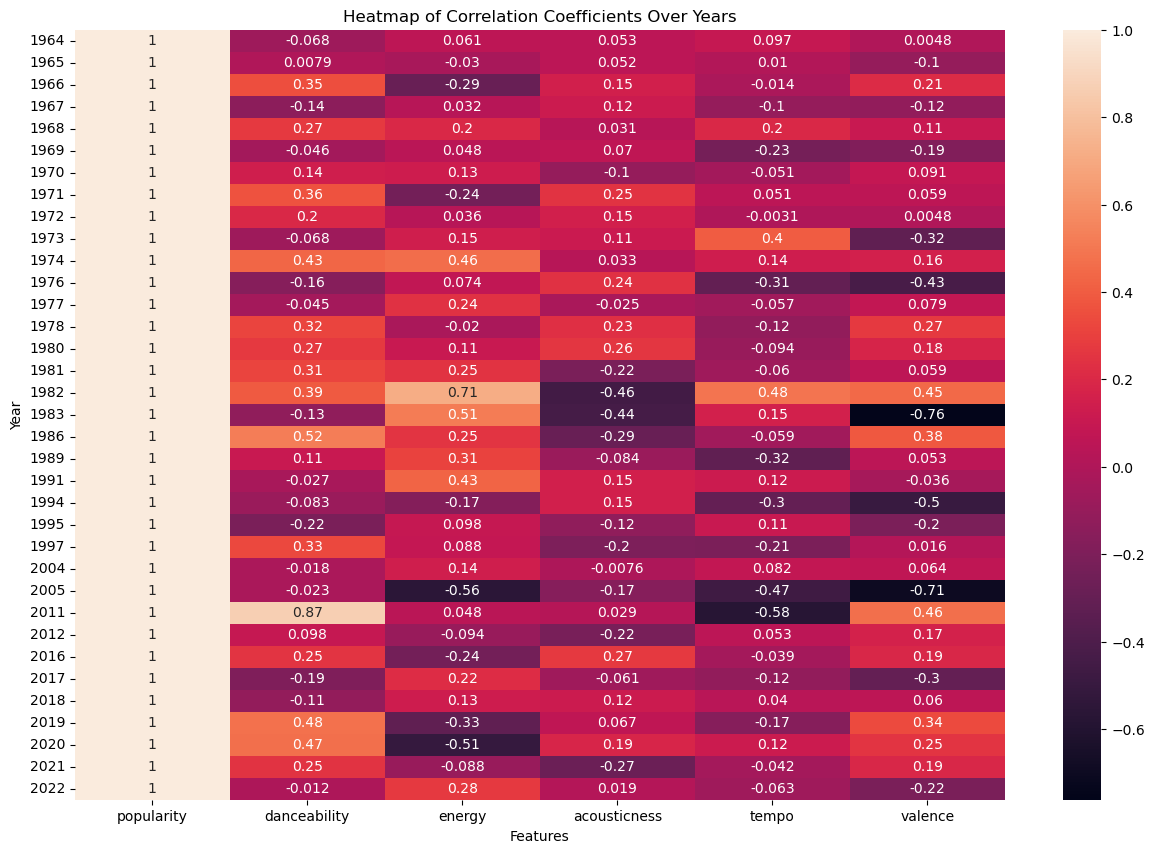

In [28]:
# visualizing correlation changes from above over the years with a heatmap

plt.figure(figsize=(15, 10))
sns.heatmap(yearly_correlations, annot=True)
plt.title('Heatmap of Correlation Coefficients Over Years')
plt.xlabel('Features')
plt.ylabel('Year')
plt.show()


### d. Provide insights on the significance of dimensionality reduction techniques. Share your ideas and elucidate your observations

Dimensionality reduction techniques help to simplify our analysis to only focus on the most important features. By doing so, we are able to improve the performance of our eventual machine learning model and gain better insight into the complex dataset.

In [29]:
# Using Prinicipal Component Analysis (PCA)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_features = pca.fit_transform(df[features])

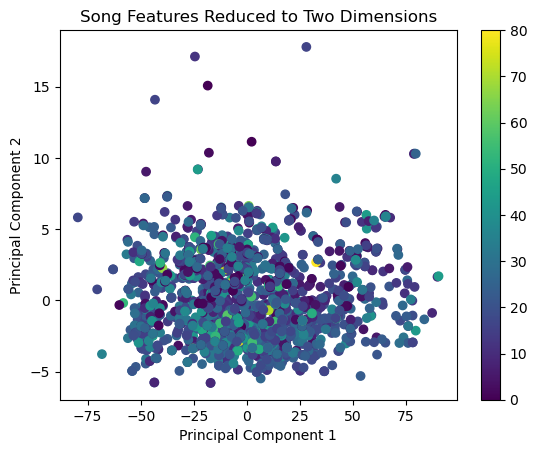

In [30]:
# visualizing results with a scatterplot

plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['popularity'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Song Features Reduced to Two Dimensions')
plt.colorbar()
plt.show()


In [31]:
loadings = pd.DataFrame(pca.components_, columns=features, index=['PC1', 'PC2'])
loadings

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
PC1,-0.001332,-0.001574,0.001247,0.000104,0.001305,0.011678,0.000341,0.999928,0.000004
PC2,0.016841,0.010291,-0.041175,-0.001080,-0.037671,-0.998169,-0.002967,0.011798,0.002282


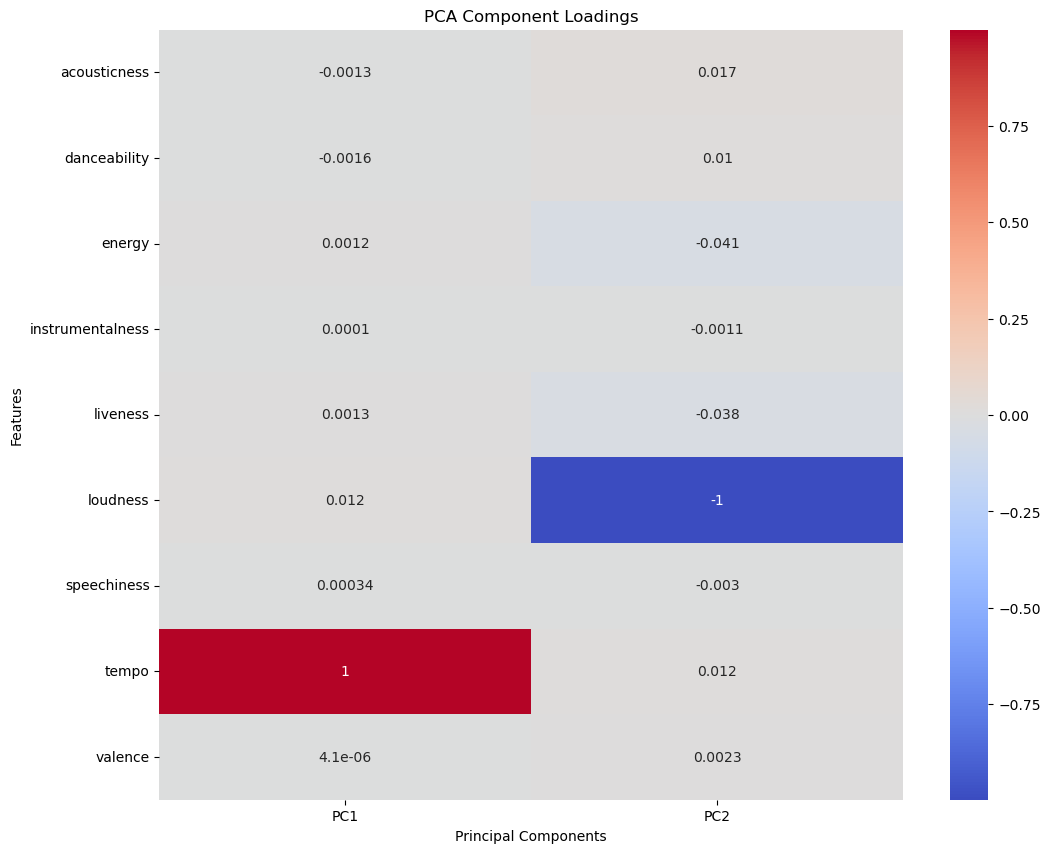

In [32]:
# visualizing PCA coefficients

plt.figure(figsize=(12,10))
sns.heatmap(loadings.transpose(), cmap='coolwarm', annot=True)
plt.title('PCA Component Loadings')
plt.xlabel('Principal Components')
plt.ylabel('Features')
plt.show()

Based on this analysis, the most important factors we should focus on are Tempo as our first principal component, and Loudness as our second principal component

## 4. Perform Cluster Analysis

### a. Identify the right number of clusters

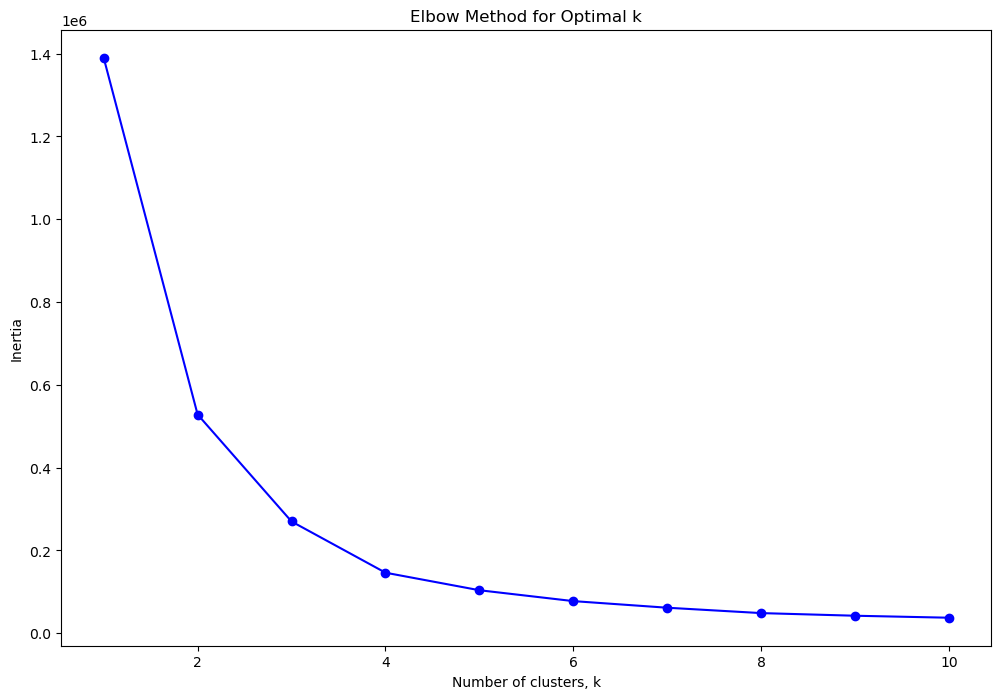

In [33]:
# Using the Elbow Method first

from sklearn.cluster import KMeans

X = df[features]

inertia =[]
K = range(1, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(12,8))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


Based on the elbow method, it looks like the optimal number of clusters would be around 4 or 5. I will run silhouette scores to get a more precise idea of the best number of clusters. 

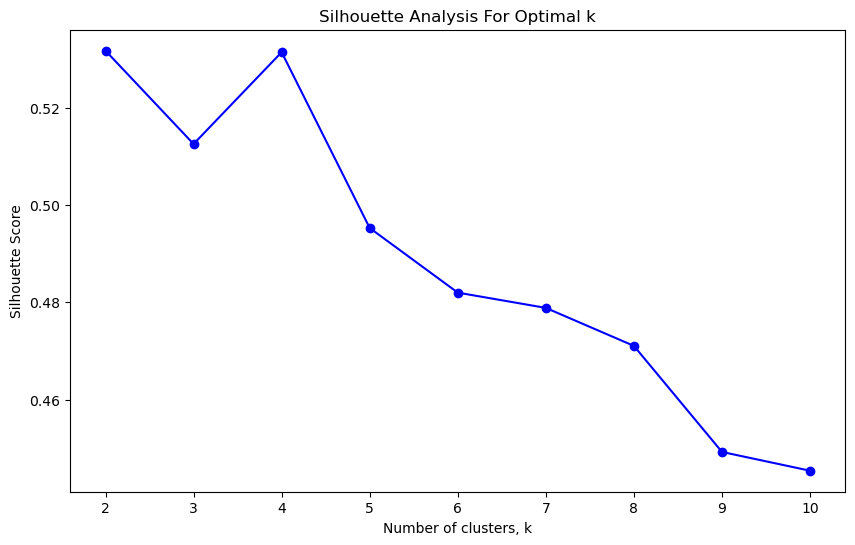

In [34]:
# silhouette scores

from sklearn.metrics import silhouette_score

silhouette_avg = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg.append(silhouette_score(X, cluster_labels))

plt.figure(figsize=(10, 6))
plt.plot(K, silhouette_avg, 'bo-')
plt.xlabel('Number of clusters, k')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis For Optimal k')
plt.show()


Based on the elbow and silhouette charts, clearly 4 clusters is the optimal number. I will move forward with 4 clusters for my algorithm (K-Means).

### b. Use appropriate clustering algorithms (I chose K-Means) and c. define each cluster based on the features

In [35]:
# applying K-Means with 4 clusters

k = 4  
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X)
df['cluster'] = clusters  # Add cluster labels to your DataFrame


In [36]:
# examining cluster centers

cluster_centers = pd.DataFrame(data = kmeans.cluster_centers_, columns = features)
print(cluster_centers)


   acousticness  danceability    energy  instrumentalness  liveness  loudness  \
0      0.247194      0.532746  0.785854          0.143490  0.452438 -7.258027   
1      0.213870      0.445574  0.857653          0.181727  0.584356 -6.078369   
2      0.232066      0.338544  0.787744          0.171083  0.477229 -7.168579   
3      0.337861      0.471572  0.686469          0.168279  0.407354 -7.932831   

   speechiness       tempo   valence  
0     0.060893  114.561943  0.621014  
1     0.079381  140.979506  0.581781  
2     0.084002  179.798051  0.541044  
3     0.058653   85.279131  0.532437  


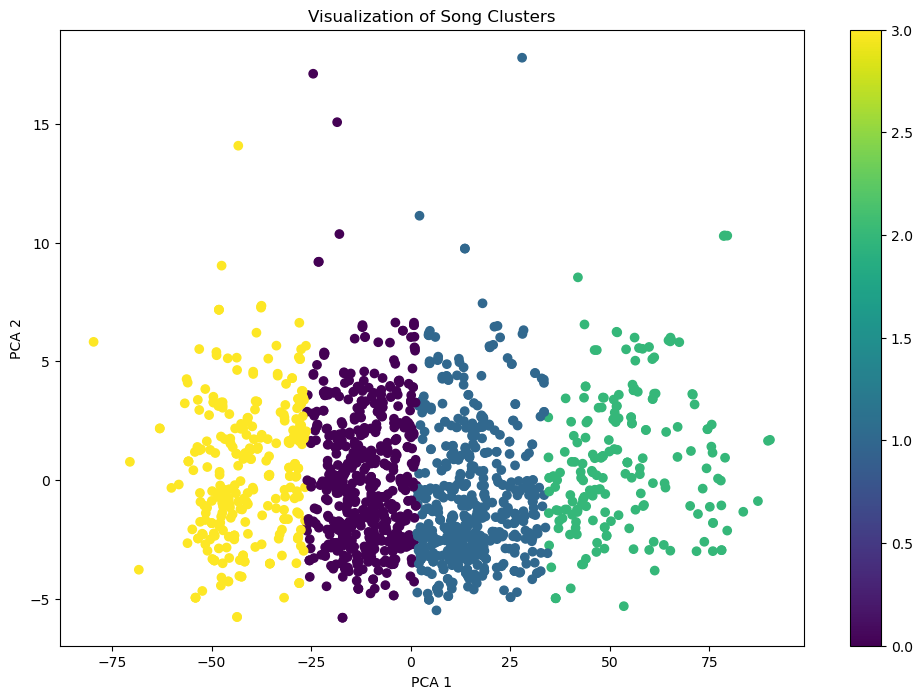

In [37]:
# visualizing the clusters and using PCA for easier analysis

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', label=clusters)
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('Visualization of Song Clusters')
plt.colorbar(scatter)
plt.show()

## Cluster Definitions / Interpretations:

Cluster 0: Medium Danceability | High Energy| Low Speechiness | Medium Tempo | Medium-High Valence
- This cluster has songs with a happy or positive mood with moderate tempo and not many spoken words. They may be a more light-hearted mood and structure with an emphasis on 'positive' and energetic sounding instrumentals.

Cluster 1: Medium Danceability | Very High Energy | Medium Speechiness | High Tempo | Medium-High Valence
- This cluster has songs with fast tempos that are likely more energetic to get people moving and engaged. The mood is likely happy but could have some darker themes or more along the "party" lines, with a mix of vocals and music solos, that the rolling stones are most famous for. 

Cluster 2: Low Danceability | High Energy | Medium-High Speechiness | Very High Tempo | Medium Valence
- This cluster has songs with extremely fast tempos and a lot of words (mixed/balanced mood). These are high energy songs with a heavy focus on the vocals, lyrics, and singers. Despite their high energy, they may be harder to dance to since there is so much going on between the instruments and vocals.

Cluster 3: Medium-Low Danceability | Medium Energy| Low Speechiness | Low Tempo | Medium Valence
- This cluster has songs that are much slower and more focused on the instrumentals, with a mixed/neutral mood to the lyrics, with some on the more melancholy side. The songs are likely slow rock, or maybe the more experimental songs where The Rolling Stones tried out jazz or blues for relaxed environments. 